In [3]:
from utils.data import load_atmospheric_predictor

variables = ["msl", "msl_gradient"]
region = (150, -20, 250, 50)
estela = True


# Load the ERA5 dynamic predictors
era5_dynamic = load_atmospheric_predictor(
    variables=variables, region=region, estela=estela
)
era5_dynamic

<xarray.Dataset> Size: 489MB
Dimensions:       (time: 8727, latitude: 70, longitude: 100)
Coordinates:
  * latitude      (latitude) float32 280B 49.62 48.62 47.62 ... -18.38 -19.38
  * time          (time) datetime64[ns] 70kB 2000-01-01 ... 2023-11-22
  * longitude     (longitude) float32 400B 150.4 151.4 152.4 ... 248.4 249.4
Data variables:
    msl           (time, latitude, longitude) float32 244MB nan ... 1.018e+05
    msl_gradient  (time, latitude, longitude) float32 244MB 0.0 0.0 ... 0.0 0.0

In [4]:
from bluemath_tk.datamining.pca import PCA
from bluemath_tk.datamining.kma import KMA
from bluemath_tk.predictor.xwt import XWT

pca = PCA(n_components=88)
kma = KMA(num_clusters=36, seed=42)

xwt = XWT(steps={"pca": pca, "kma": kma})
xwt.fit(
    data=era5_dynamic,
    fit_params={
        "pca": {
            "vars_to_stack": variables,
            "coords_to_stack": ["latitude", "longitude"],
            "pca_dim_for_rows": "time",
        },
        "kma": {
            "normalize_data": False,
            # "min_number_of_points": 10,
        },
    },
    variable_to_sort_bmus="msl",
)
# xwt.save_model("data/dwt_model_california.pkl")

2025-03-24 16:59:11,025 - PCA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-24 16:59:11,026 - KMA - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-24 16:59:11,028 - XWT - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.



        -------------------------------------------------------------------
        | Initializing PCA reduction model with the following parameters:
        |    - n_components: 88
        |    - is_incremental: False
        | For more information, please refer to the documentation.
        -------------------------------------------------------------------
        


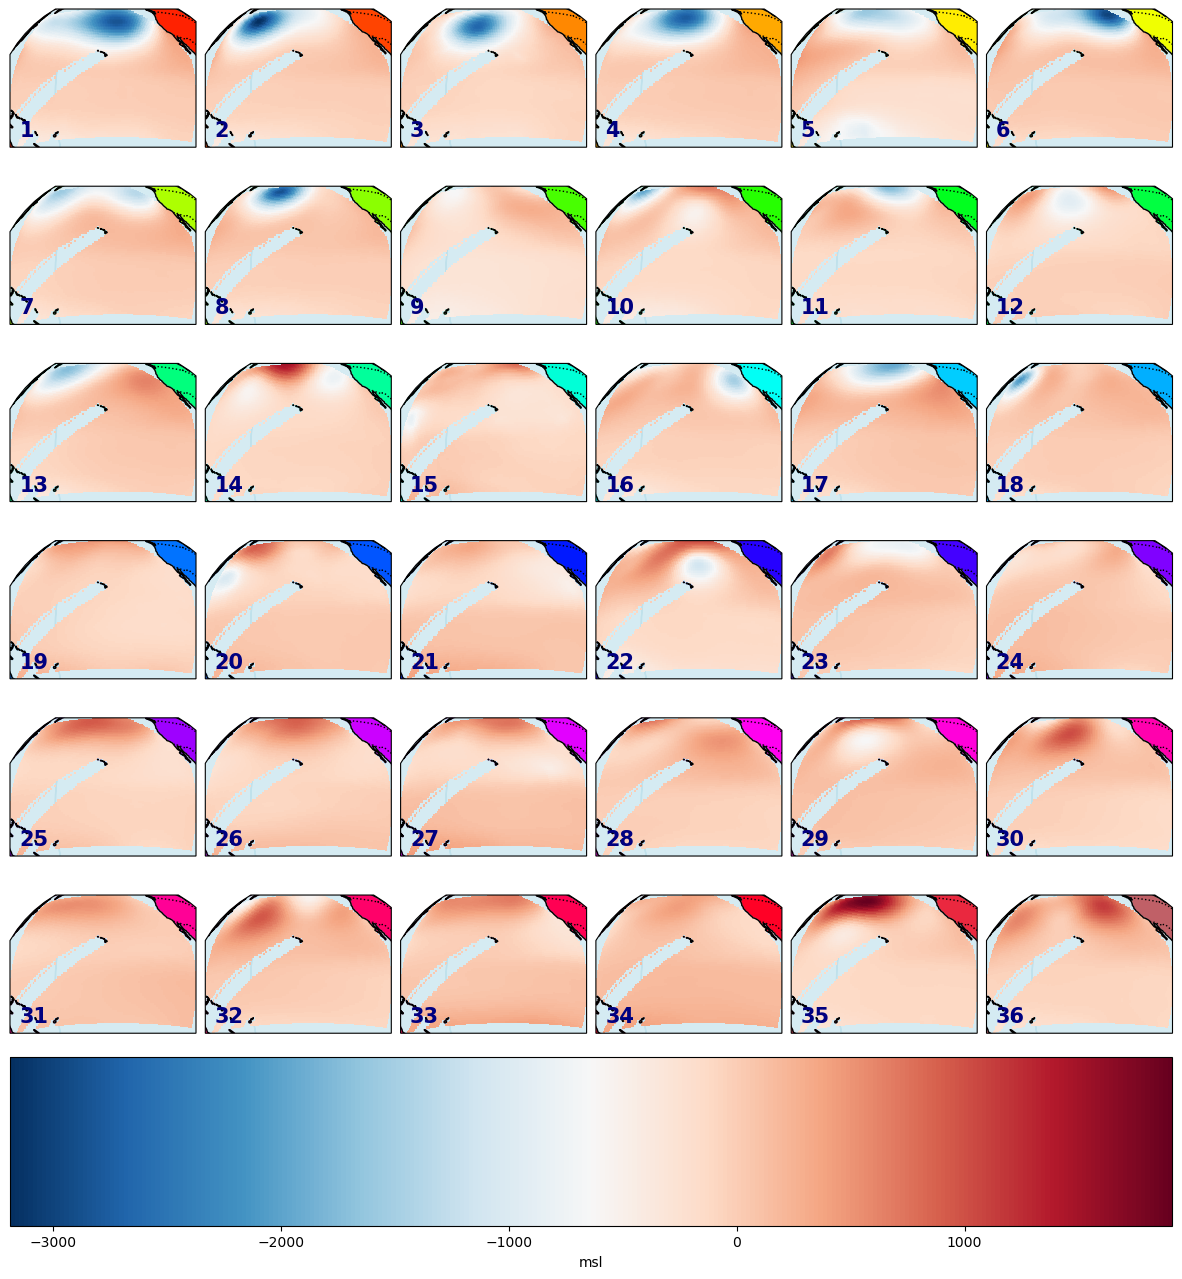

In [5]:
xwt.plot_xwts(var_to_plot="msl", anomaly=True, map_center=(-150, -10))

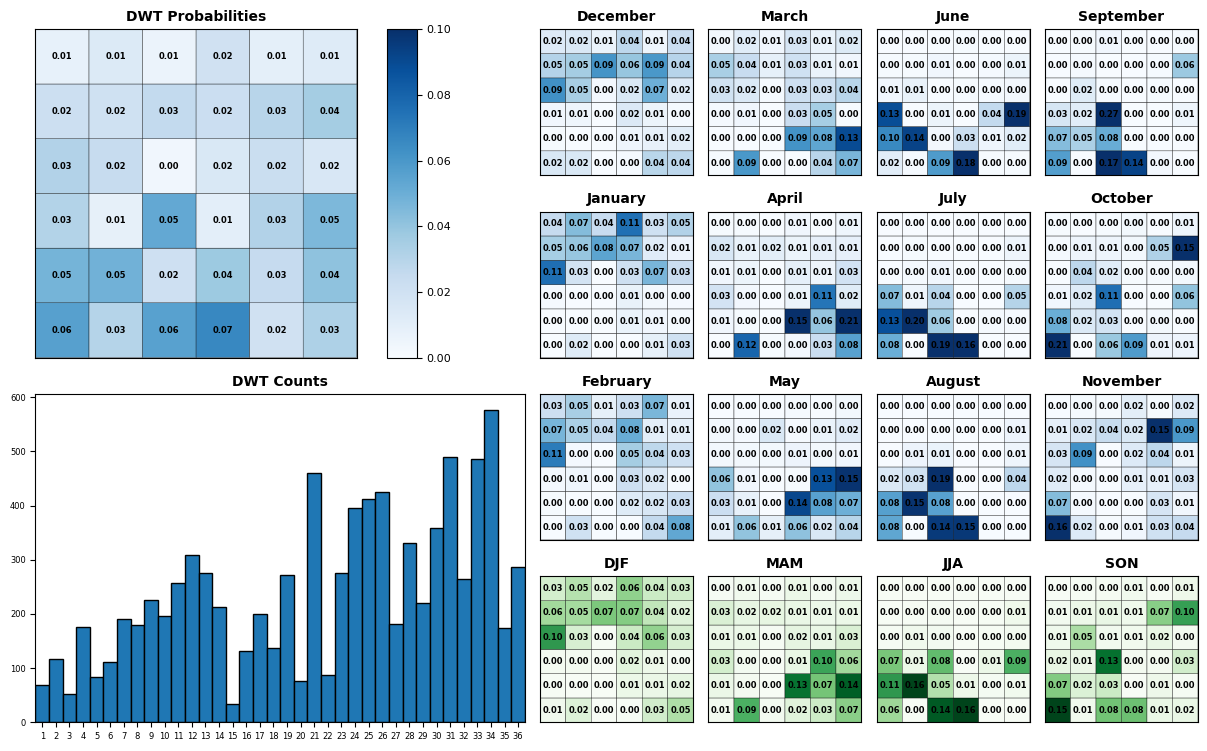

In [6]:
xwt.plot_dwts_probs(plot_text=True)

<Axes: >

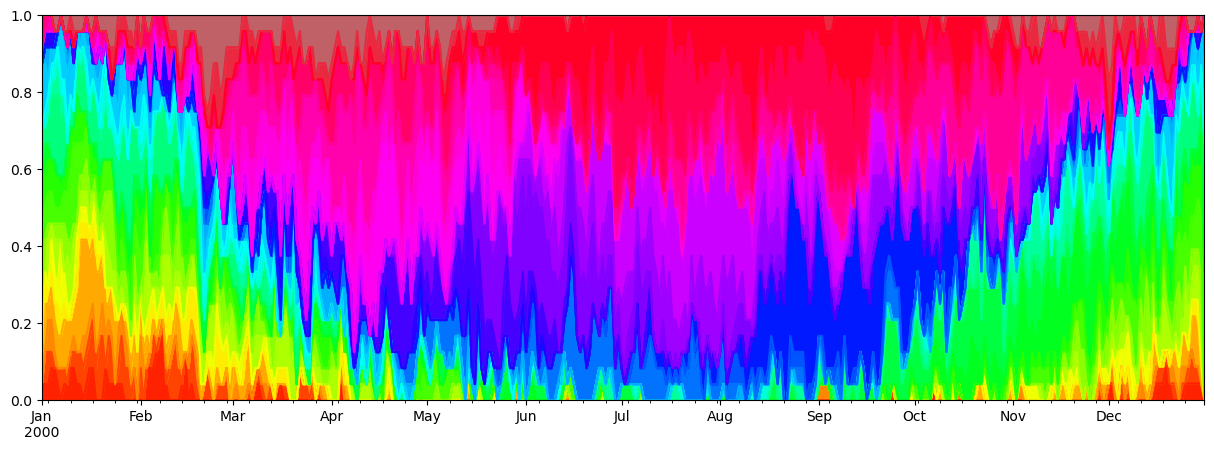

In [7]:
xwt.plot_perpetual_year()